<a href="https://colab.research.google.com/github/isparekh/MNIST_DNN/blob/master/MNIST_LessParams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist



```
# Load MNIST data, reshaping and converting into binary matrices
```



In [0]:
def load_mnist_data():

  (trainData, trainLabels), (testData, testLabels) = mnist.load_data()

  trainData = trainData.reshape(train_size,img_rows,img_cols,1)
  testData = testData.reshape(test_size,img_rows,img_cols,1)

  mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
  mTestLabels = np_utils.to_categorical(testLabels, num_classes)

  return trainData, mTrainLabels, testData, mTestLabels



```
# Creating and compiling the model for MNIST digits
```



In [0]:
def mnist_model():
    model = Sequential()
        
    input_nn=layers.Input(shape=(img_rows,img_cols,1), name='image')
    mnistLay1=layers.Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(input_nn)
    mnistLay1=layers.Conv2D(2,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same')(mnistLay1)
    mnistLay1=layers.Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(mnistLay1)
    mnistLay1=layers.BatchNormalization()(mnistLay1)
    mnistLay1=layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(mnistLay1)
    mnistLay1=layers.Dropout(0.25)(mnistLay1)

    mnistLay2=layers.Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(input_nn)
    mnistLay2=layers.Conv2D(4,kernel_size=(3,3),strides=(2,2),activation='relu',padding='same')(mnistLay2)
    mnistLay2=layers.Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(mnistLay2)
    mnistLay2=layers.BatchNormalization()(mnistLay2)
    mnistLay2=layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(mnistLay2)
    mnistLay2=layers.Dropout(0.25)(mnistLay2)

    mnistLay3=layers.Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(input_nn)
    mnistLay3=layers.Conv2D(6,kernel_size=(5,5),strides=(2,2),activation='relu',padding='same')(mnistLay3)
    mnistLay3=layers.Conv2D(6,kernel_size=(1,1),activation='relu',padding='same')(mnistLay3)
    mnistLay3=layers.BatchNormalization()(mnistLay3)
    mnistLay3=layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(mnistLay3)
    mnistLay3=layers.Dropout(0.25)(mnistLay3)

    mrg=layers.concatenate([mnistLay1,mnistLay2,mnistLay3])

    flatten=layers.Flatten()(mrg)

    dense=layers.Dense(10,activation='relu')(flatten)

    output_nn=layers.Dense(10,activation='softmax')(dense)

    model=Model(inputs=input_nn, outputs=output_nn)

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model




```
# Global settings
```



In [0]:
nb_epoch = 25
num_classes = 10
batch_size = 32
train_size = 60000
test_size = 10000
img_rows, img_cols = 28, 28

In [0]:
seed = 7
np.random.seed(seed)



```
# Importing MNIST data
```



In [0]:
X_train, Y_train, X_test, Y_test = load_mnist_data()



```
# Selecting a model to fit
```



In [0]:
model = mnist_model()



```
# Displaying model summary
```



In [372]:
model.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_291 (Conv2D)             (None, 28, 28, 2)    4           image[0][0]                      
__________________________________________________________________________________________________
conv2d_294 (Conv2D)             (None, 28, 28, 4)    8           image[0][0]                      
__________________________________________________________________________________________________
conv2d_297 (Conv2D)             (None, 28, 28, 6)    12          image[0][0]                      
___________________________________________________________________________________________



```
# Training the model
```



In [373]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1074 - acc: 0.9665 - val_loss: 0.0740 - val_acc: 0.9765
Epoch 6/25
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1034 - acc: 0.9681 - val_loss: 0.0669 - val_acc: 0.9789
Epoch 7/25
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0994 - acc: 0.9690 - val_loss: 0.0740 - val_acc: 0.9766
Epoch 8/25
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0946 - acc: 0.9700 - val_loss: 0.0664 - val_acc: 0.9794
Epoch 9/25
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0916 - acc: 0.9709 - val_loss: 0.0546 - val_acc: 0.9830
Epoch 10/25
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0881 - acc: 0.9722 - val_loss: 0.0557 - val_acc: 0.9817
Epoch 11/25
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0865 - acc: 0.9730 - val_loss: 0.0554 - val_acc: 0.9829
Epoch 12/25
60000/60000 [===========

In [374]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])




```
# Evaluating the model
```



In [0]:
scores = model.evaluate(X_test, Y_test, verbose=0)



```
# Plotting train and test accuracy
```



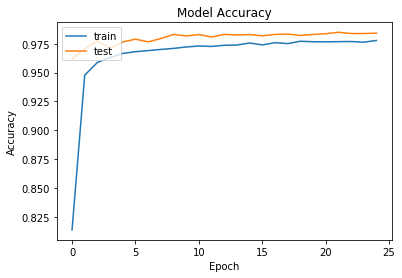

In [379]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()



```
# Plotting train and test loss
```



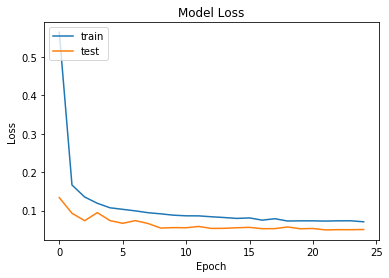

In [380]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()



```
# Printing the results
```



In [381]:
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

Test score: 0.05081732467196416
Test accuracy: 0.9841
